In [54]:
import tensorflow as tf
import numpy as np
import tensorflow.contrib.layers as layers
import seaborn as sns

In [2]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from flows import NVPFlow, FlowSequence, ResFlow, BNFlow, phase, floatX, Normalizer

In [3]:
inp = tf.placeholder(floatX, [None, 2])

In [4]:
flow = ResFlow(2, 'res_init', normalize=True)(inp)
flow = NVPFlow(name='nvp_init', normalize=True)(flow)

for i in range(0, 17):
    flow = ResFlow(name='res_' + str(i), normalize=True)(flow)
    flow = NVPFlow(name='nvp_' + str(i), normalize=True)(flow)

In [5]:
flow[-1].output /= 2

In [6]:
flow[-1].logj.shape

TensorShape([Dimension(None)])

In [7]:
flows = flow

In [8]:
logj = flows.calc_logj()

In [9]:
logj

<tf.Tensor 'add_36:0' shape=(?,) dtype=float64>

In [10]:
mm = np.zeros(2, np.int)
for fl in flows:
    if hasattr(fl, 'mask'):
        mm += fl.mask
        print(fl.mask)

[ True False]
[False  True]
[False  True]
[ True False]
[ True False]
[False  True]
[False  True]
[ True False]
[ True False]
[False  True]
[False  True]
[ True False]
[False  True]
[ True False]
[ True False]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[False  True]
[ True False]
[ True False]
[False  True]


In [11]:
mm

array([18, 18])

In [12]:
with tf.name_scope('gain_scope'):
    z = flows[-1].output
    gain = tf.reduce_sum(-(z*z)/2, axis=-1) + logj
    gain = tf.reduce_mean(gain)

In [13]:
lr = tf.Variable(0.001, trainable=False, name='learning_rate')
train_op = tf.train.AdamOptimizer(lr).minimize(-gain)
train_op = [train_op] + flows.get_ops()

In [61]:
X, _ = make_moons(n_samples=4024, noise=0.13)

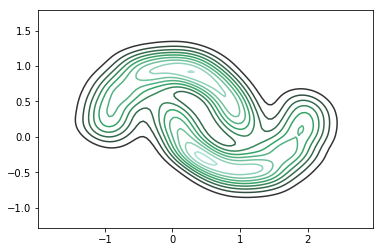

In [62]:
sns.kdeplot(X[:,0], X[:,1], kernel='tri')
plt.show()

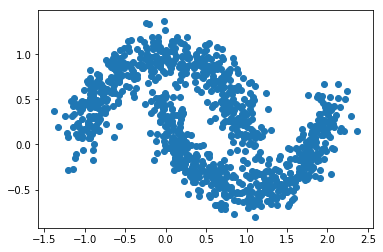

In [15]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [16]:
sess = tf.InteractiveSession()

In [17]:
tf.global_variables_initializer().run()

In [18]:
logj.eval({inp:X, phase: False}).mean()

-12.47439384348121

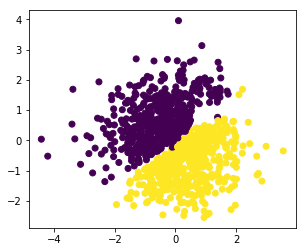

In [64]:
X, y = make_moons(n_samples=1024, noise=0.13)
ver = z.eval({inp:X, phase:False})

ax = plt.gca()
ax.set_aspect('equal')
plt.scatter(ver[:,0], ver[:,1], c=y)
plt.show()

In [32]:
sess.run(lr.assign(0.0001))

1e-04

In [20]:
!rm -R /tmp/tfdbg
writer = tf.summary.FileWriter('/tmp/tfdbg')

In [21]:
writer.add_graph(tf.get_default_graph())

In [22]:
all_sum = tf.summary.merge_all()

In [63]:
for _ in range(40000):
    for _ in range(300):
        X, _ = make_moons(n_samples=256, noise=0.13)
        sess.run(train_op, {inp:X, phase:True})
    print(gain.eval({inp:X, phase: True}))
    writer.add_summary(all_sum.eval({inp:X, phase:True}))

-10.882450083477094
-10.785751424656963
-10.778795083916307
-10.73735882221063
-10.753731349654123
-10.748286936288302
-10.76343534558432
-10.84404545605798
-10.814466019331695
-10.766774023857051
-10.741778633303294
-10.812064418312659
-10.776422109487635
-10.724123042549099
-10.839333640471445
-10.779759811221885
-10.832285554037714
-10.807176506767853
-10.724952400930908
-10.733076189709841
-10.764014427641719
-10.778269607507553
-10.75614271209881
-10.808365097322614
-10.750527366200455
-10.6936040805974
-10.794296353991394
-10.815627658174009
-10.732942690490175
-10.717327040739619
-10.749185854010308
-10.759708856802861
-10.759180570290992
-10.806997422236758
-10.771455406578816
-10.799335078844742
-10.787892880882321
-10.823519128220608
-10.757059592248929
-10.758789260319443
-10.767041736761339
-10.795741481401055
-10.837914738744015
-10.77192127986254
-10.75290399284853
-10.783844441718266
-10.806477984210574
-10.708657784993035
-10.776235350719514
-10.803704342557413
-10.7520

-10.719568672163074
-10.659536331271386
-10.690934842205564
-10.713465391915008
-10.696416987535645
-10.711677345288956
-10.650632925163189
-10.676119854144828
-10.726446139223652
-10.638774601923858
-10.664103007866887
-10.689967925951095
-10.632824761243924
-10.703805685723742
-10.67644679971951
-10.693787581115306
-10.714867685995982
-10.636061927702816
-10.763422497096766
-10.712788567912046
-10.721123076314207
-10.6569616415421
-10.656243332695176
-10.76644719865921
-10.70738442102337
-10.726911532220917
-10.73967402064224
-10.743623497116126
-10.690683407277938
-10.734271739784933
-10.68181480958269
-10.664947059284552
-10.661366483276975
-10.634797016706454
-10.70237484627944
-10.668159749856308
-10.727916579748104
-10.75241707448282
-10.664633257611642
-10.630100242606996
-10.712672722239219
-10.640656997926126
-10.58402126482369
-10.768930172029195
-10.753247841206482
-10.797888868809999
-10.665820983615799
-10.668282387722101
-10.714040271117085
-10.682967804714774
-10.650359

-10.64859840722649
-10.694676672625274
-10.638030651653166
-10.636668367083065
-10.700307556335288
-10.63251290381907
-10.701192055840046
-10.69581732348093
-10.597738381965897
-10.661433334433376
-10.644150308255195
-10.740556835483524
-10.658073296319262
-10.60056187179353
-10.634936650644914
-10.647956866444424
-10.578308586200137
-10.678560016521871
-10.651032077464407
-10.638393290029336
-10.644354226185243
-10.591899049251499
-10.632681430902352
-10.655419918422906
-10.700003127348523
-10.665375471981644
-10.587580232723933
-10.729516857800588
-10.633806318899053
-10.650000765706167
-10.711930725940746
-10.678380593244302
-10.642813095300616
-10.626239194887035
-10.673937710772641
-10.65110761577431
-10.646148809537745
-10.620828862275573
-10.686259326969953
-10.657046635776265
-10.563419650112701
-10.689378348429306
-10.652256850064695
-10.65408966062774
-10.631694465978462
-10.716470411659031
-10.623511604034096
-10.675902963650717
-10.612656505830028
-10.642840875248979
-10.66

-10.606499366947125
-10.675449698868228
-10.631270138483067
-10.696757775215453
-10.618861261278562
-10.5174950340339
-10.639186702784713
-10.657856143755584
-10.57103359111244
-10.641101948954088
-10.647632864024459
-10.57535721951026
-10.60846218150372
-10.680355522700442
-10.708039848899066
-10.622247677355922
-10.611787497577511
-10.636435431842681
-10.58051653373203
-10.622833395806978
-10.611969512453044
-10.680126245107466
-10.607910597168015
-10.730618128362416
-10.66027009930944
-10.672492562733947
-10.657890548607087
-10.664662694990387
-10.615331566042684
-10.567453525977182
-10.594726267427188
-10.63325141445433
-10.66321506471283
-10.634837084992213
-10.578351135783322
-10.607553523768754
-10.612722317857889
-10.64754140646913
-10.643838458166433
-10.717602084665673
-10.6028633672538
-10.61514953247859
-10.611084440007755
-10.601891099949322
-10.700923154393731
-10.599156613841771
-10.619414474132942
-10.601788156054187
-10.634962424529366
-10.595116295801631
-10.545447419

KeyboardInterrupt: 

In [26]:
inverse = flows.apply(inp*2, inverse=True)

In [69]:
restored = inverse.eval({inp:np.random.normal(size=[1000,2]), phase: False})
#restored = inverse.eval({inp:ver})

In [70]:
restored = restored[np.logical_not(np.any(restored**2 > 30, axis=-1))]

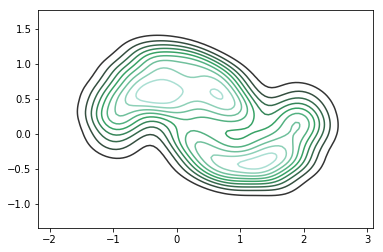

In [71]:
sns.kdeplot(restored[:,0], restored[:,1])
plt.show()

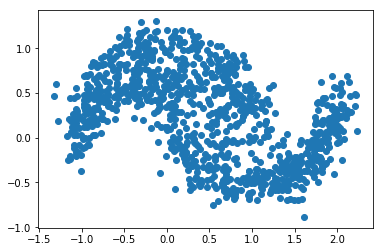

In [72]:
plt.scatter(restored[:,0], restored[:,1])
plt.show()

In [32]:
flows.ops

[]